# Импорт библиотек


In [ ]:
import pickle
from pathlib import Path
folder_path = Path().cwd()/'drive'/'MyDrive'/'Colab Notebooks'/'ML'/'3 sem'/'reg'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Импорт данных

In [ ]:
with open(folder_path/'data'/'Target.pkl', 'rb') as file:
  target = pickle.load(file)

with open(folder_path/'data'/'Test.pkl', 'rb') as file:
  test = pickle.load(file)

with open(folder_path/'data'/'Train.pkl', 'rb') as file:
  train = pickle.load(file)

with open(folder_path/'data'/'submission.pkl', 'rb') as file:
  submission = pickle.load(file)

In [ ]:
target = pd.read_pickle(folder_path/'data'/'Target.pkl')
train = pd.read_pickle(folder_path/'data'/'Train.pkl')
test = pd.read_pickle(folder_path/'data'/'Test.pkl')

In [ ]:
train.columns = [column_name.replace(' ', '_') for column_name in train]
test.columns = [column_name.replace(' ', '_') for column_name in train]
train.head(1)

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
0,83485,192,-0.793055,2.146826,69065,-1.669705,50125,28150,2015,4,...,-1.848419,92262,2.410047,-2.634328,82117,-3.890304,68867,48164,51872,11


# EDA

In [ ]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82548 entries, 0 to 82547
Columns: 121 entries, ID to feature_119
dtypes: float64(50), int64(71)
memory usage: 76.2 MB
None


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119
0,83485,192,-0.793055,2.146826,69065,-1.669705,50125,28150,2015,4,...,-1.848419,92262,2.410047,-2.634328,82117,-3.890304,68867,48164,51872,11
1,61327,349,1.104836,5.225879,36752,-1.733360,79442,68217,2017,11,...,-0.819262,86257,-0.241159,-3.974434,100267,0.398294,81463,76968,97572,6
2,11507,-1,-0.576450,-0.216464,26222,5.303614,94105,60036,2015,15,...,-0.037468,29364,1.667534,3.808748,17868,-1.129200,16708,81893,86716,5
3,21702,-1,0.950735,6.027220,16806,-5.240428,41475,43285,2015,1,...,0.421387,103000,-0.767304,2.483723,662,-0.547571,33735,20083,2596,2
4,102575,295,1.002829,3.167539,18750,-3.269408,31965,58322,2000,14,...,-0.171998,102439,-0.281879,-1.991910,49932,2.693124,26524,21624,51450,5


In [ ]:
len(train.drop_duplicates())

82548

Повторяющихся строк в данных нет.

In [ ]:
target.head()

,ID,label
0,83485,56400
1,61327,139999
2,11507,77900
3,21702,87000
4,102575,3699


Посмотрим на распределение таргета:

<Axes: xlabel='label', ylabel='Count'>

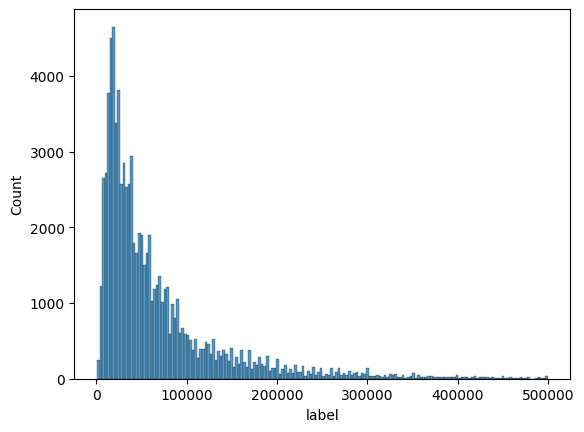

In [ ]:
sns.histplot(target.label[target.label<=500000])

Посмотрим на корреляцию данных с таргетом и дург с другом:

In [ ]:
train_target = pd.concat([train, target.label], axis=1)
train_target.head(5)

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,83485,192,-0.793055,2.146826,69065,-1.669705,50125,28150,2015,4,...,92262,2.410047,-2.634328,82117,-3.890304,68867,48164,51872,11,56400
1,61327,349,1.104836,5.225879,36752,-1.733360,79442,68217,2017,11,...,86257,-0.241159,-3.974434,100267,0.398294,81463,76968,97572,6,139999
2,11507,-1,-0.576450,-0.216464,26222,5.303614,94105,60036,2015,15,...,29364,1.667534,3.808748,17868,-1.129200,16708,81893,86716,5,77900
3,21702,-1,0.950735,6.027220,16806,-5.240428,41475,43285,2015,1,...,103000,-0.767304,2.483723,662,-0.547571,33735,20083,2596,2,87000
4,102575,295,1.002829,3.167539,18750,-3.269408,31965,58322,2000,14,...,102439,-0.281879,-1.991910,49932,2.693124,26524,21624,51450,5,3699


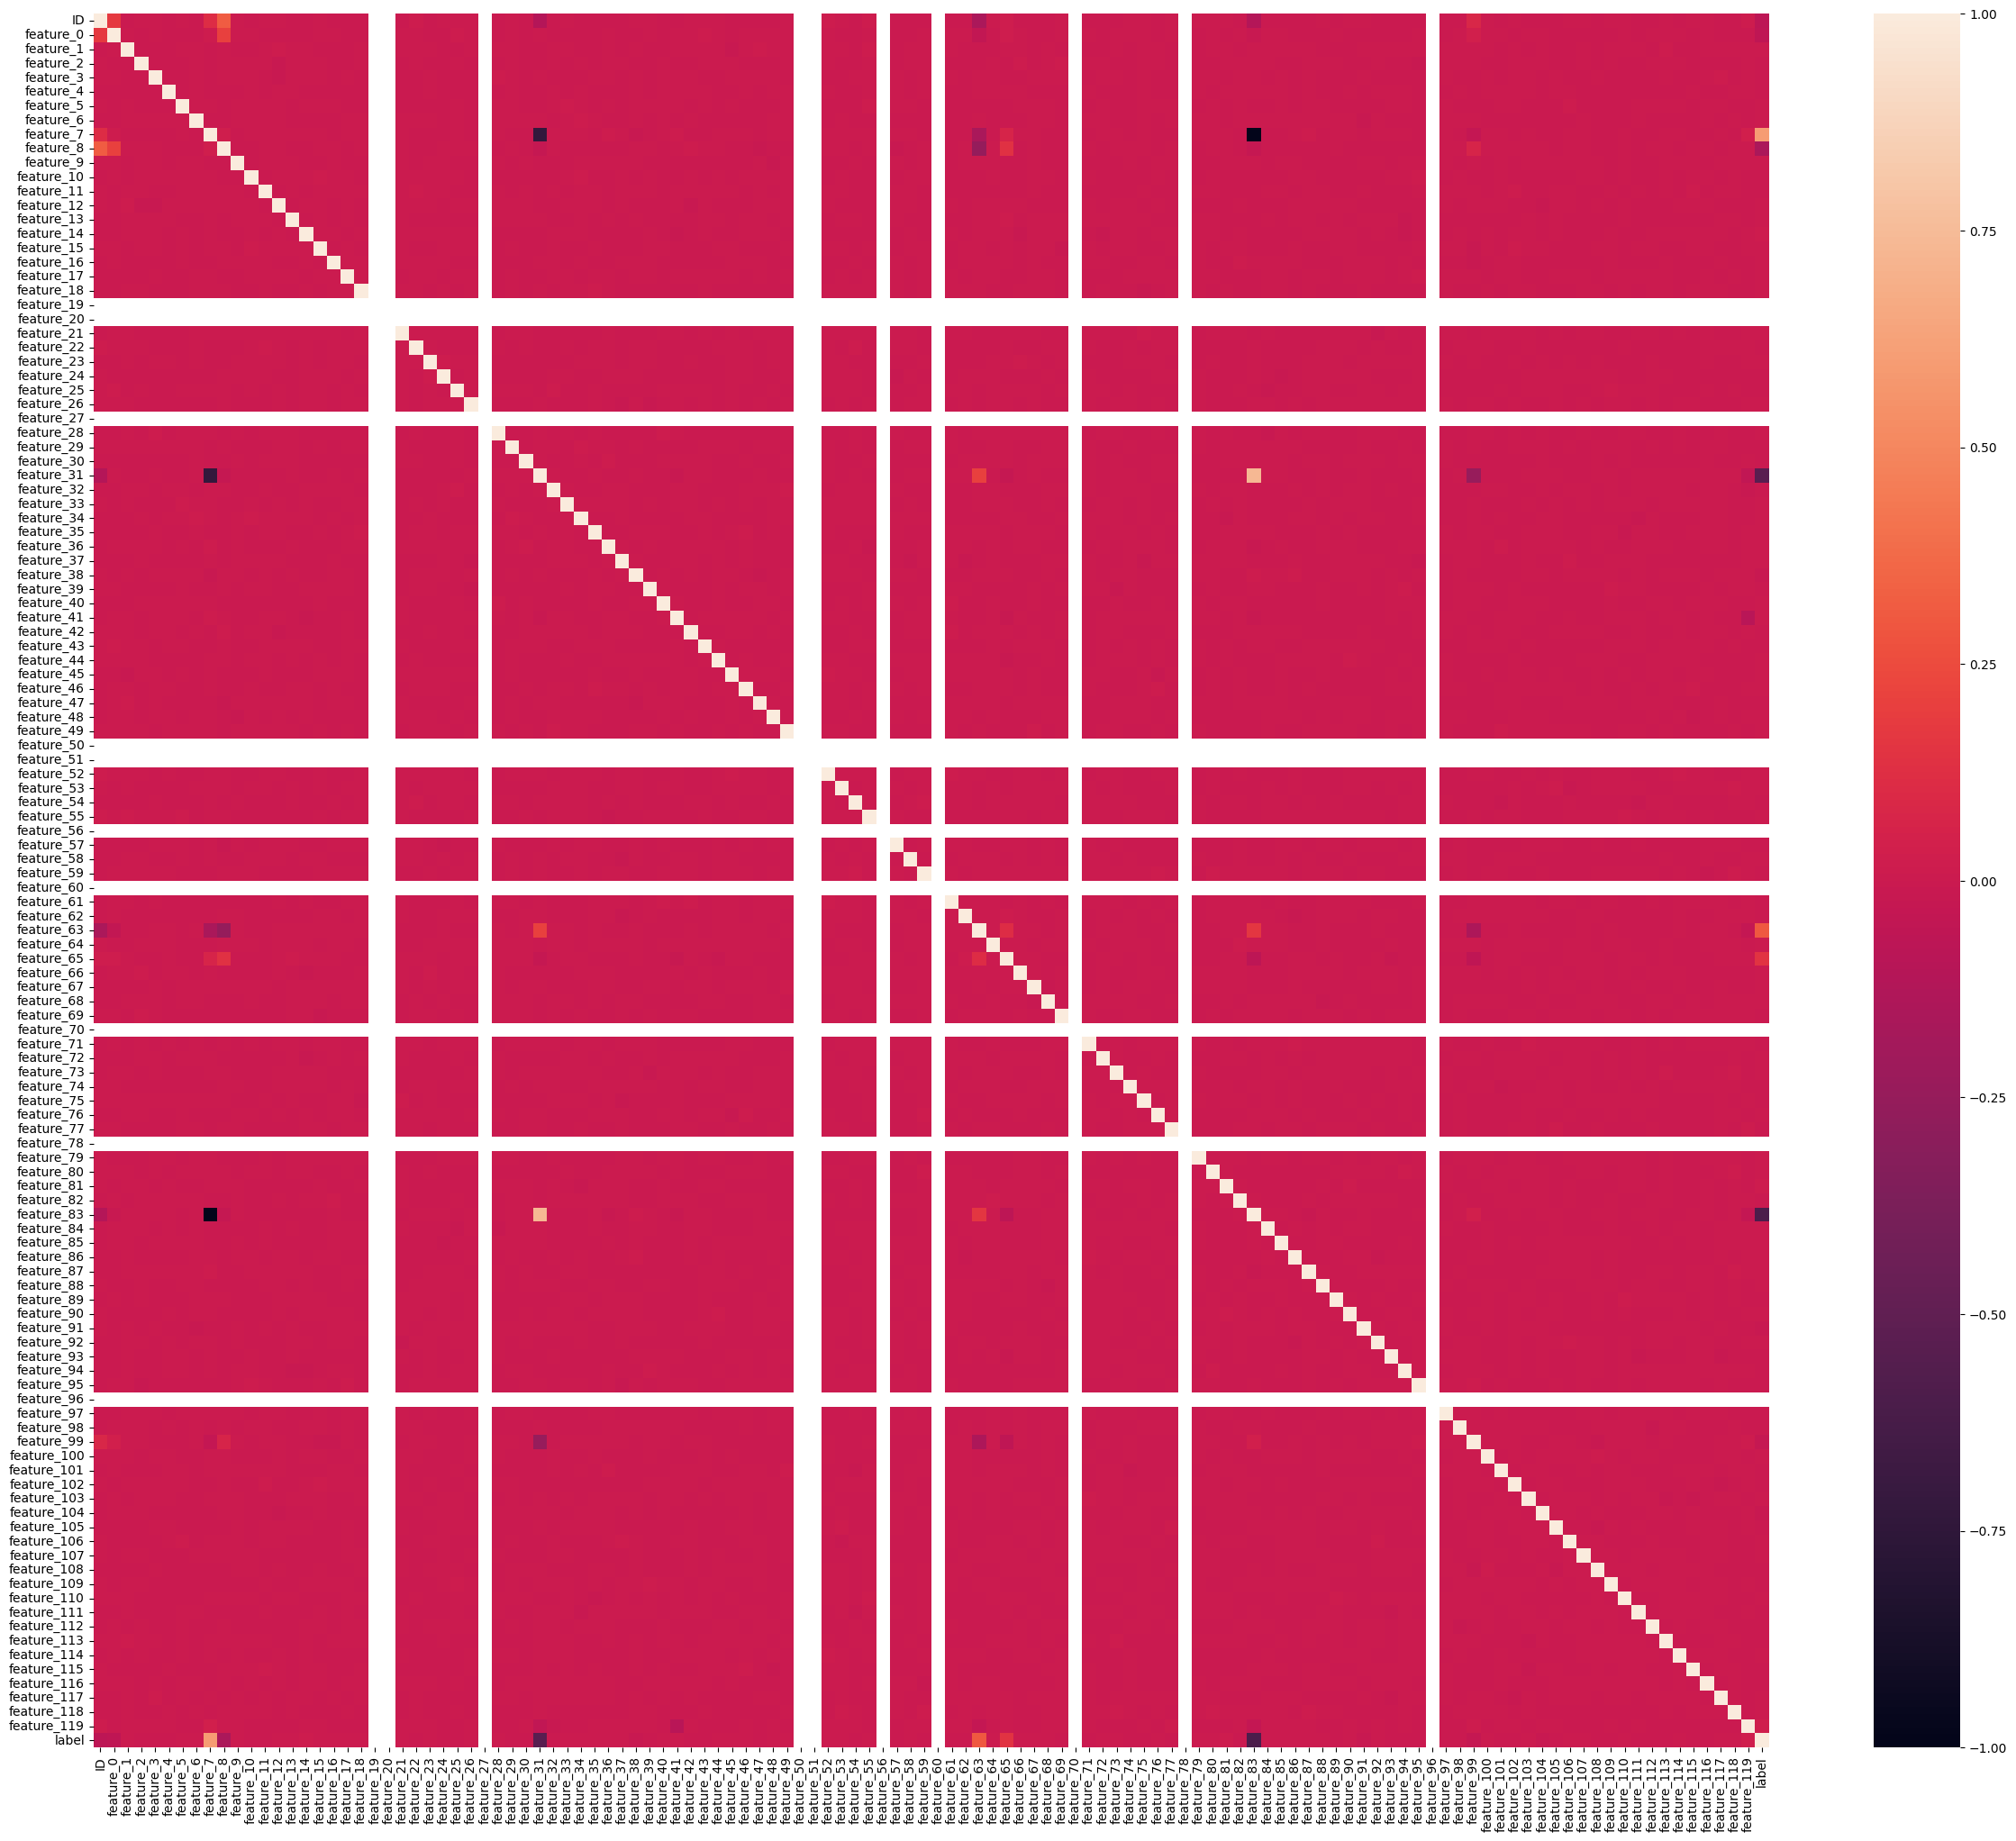

In [ ]:
fig = plt.figure(figsize=(30, 25))
sns.heatmap(train_target.corr())
plt.show()

Примеры фичей, для которых не можем посчитать корреляцию:

In [ ]:
train.feature_19.value_counts()

5    82548
Name: feature_19, dtype: int64

In [ ]:
train.feature_20.value_counts()

2    82548
Name: feature_20, dtype: int64

Выберем из данных только те фичи, которые хотя бы немного коррелируют с таргетом:

In [ ]:
useful_columns = [feature for feature in train_target[train_target.columns[1:]] if feature != 'label'
                                                              and train_target[['label', feature]].corr().label[feature] not in [1, np.nan]
                                                              and (train_target[['label', feature]].corr().label[feature] >= 0.05
                                                              or train_target[['label', feature]].corr().label[feature] <= -0.05)]

useful_columns.append('label')

In [ ]:
useful_columns

['feature_0',
 'feature_7',
 'feature_8',
 'feature_31',
 'feature_63',
 'feature_65',
 'feature_83',
 'label']

In [ ]:
use_data = train_target[useful_columns]
use_data.head()

,feature_0,feature_7,feature_8,feature_31,feature_63,feature_65,feature_83,label
0,192,2015,4,110000,1598,67,7,56400
1,349,2017,11,45000,1991,109,5,139999
2,-1,2015,15,135000,1598,307,7,77900
3,-1,2015,1,82000,1984,223,7,87000
4,295,2000,14,101000,1497,37,22,3699


Посмотрим на фичи детальнее:

In [ ]:
use_data.corr()

,feature_0,feature_7,feature_8,feature_31,feature_63,feature_65,feature_83,label
feature_0,1.000000,0.015568,0.204045,0.003604,-0.043323,0.020609,-0.015568,-0.062497
feature_7,0.015568,1.000000,0.030184,-0.731865,-0.161377,0.068636,-1.000000,0.594087
feature_8,0.204045,0.030184,1.000000,-0.025367,-0.252219,0.134229,-0.030184,-0.152962
feature_31,0.003604,-0.731865,-0.025367,1.000000,0.203651,-0.024819,0.731865,-0.538230
feature_63,-0.043323,-0.161377,-0.252219,0.203651,1.000000,0.113659,0.161377,0.300301
feature_65,0.020609,0.068636,0.134229,-0.024819,0.113659,1.000000,-0.068636,0.146100
feature_83,-0.015568,-1.000000,-0.030184,0.731865,0.161377,-0.068636,1.000000,-0.594087
label,-0.062497,0.594087,-0.152962,-0.538230,0.300301,0.146100,-0.594087,1.000000


<Axes: >

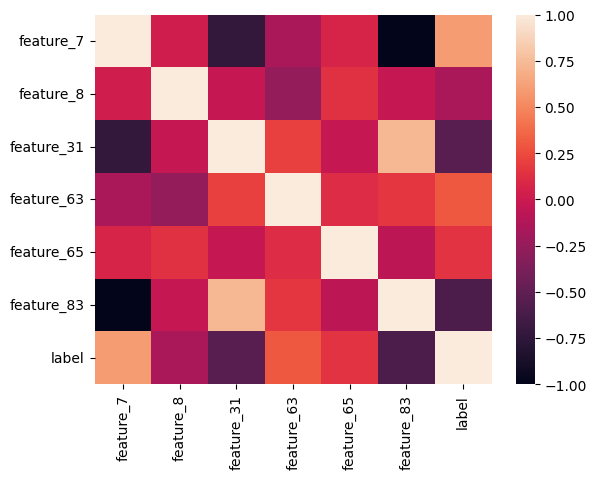

In [ ]:
sns.heatmap((use_data.corr()))

7 и 83 фичи функционально связаны, оставим из них только одну. Например 7:

In [ ]:
use_data = use_data.drop('feature_83', axis=1)

In [ ]:
use_data.describe()

,feature_0,feature_7,feature_8,feature_31,feature_63,feature_65,label
count,82548.000000,82548.000000,82548.000000,8.254800e+04,82548.000000,82548.000000,8.254800e+04
mean,126.370209,2012.936800,11.421791,1.407026e+05,1812.067016,155.026130,7.035714e+04
std,116.980277,5.687987,7.080628,9.258663e+04,647.753470,96.701892,8.522137e+04
min,-1.000000,1964.000000,0.000000,0.000000e+00,0.000000,0.000000,5.000000e+02
25%,-1.000000,2009.000000,5.000000,6.684500e+04,1461.000000,63.000000,2.114325e+04
50%,97.000000,2013.000000,11.000000,1.460000e+05,1796.000000,157.000000,4.190000e+04
75%,233.000000,2018.000000,17.000000,2.027068e+05,1995.000000,240.000000,8.390000e+04
max,363.000000,2022.000000,22.000000,2.800000e+06,7600.000000,327.000000,2.399900e+06


## 0 фича

<Axes: xlabel='feature_0', ylabel='Count'>

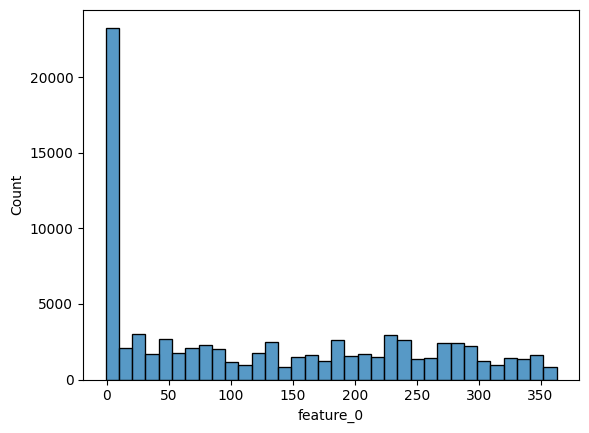

In [ ]:
sns.histplot(use_data.feature_0)

In [ ]:
use_data.feature_0.value_counts()

-1      21046
 3       1089
 276      953
 10       828
 237      822
        ...  
 9         14
 14        11
 21         8
 15         4
 282        3
Name: feature_0, Length: 365, dtype: int64

<Axes: xlabel='feature_0', ylabel='Count'>

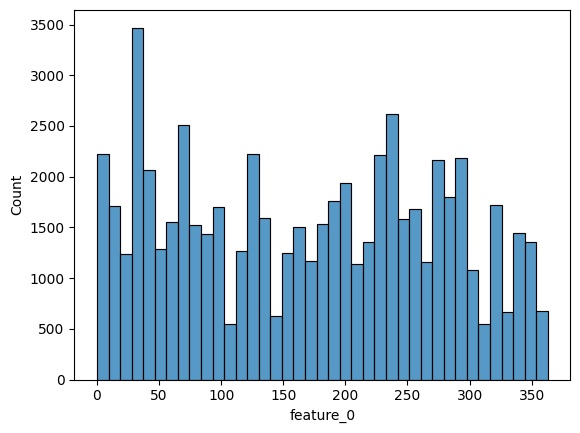

In [ ]:
sns.histplot(use_data[use_data.feature_0!=-1].feature_0)

## 7 фича

<Axes: xlabel='feature_7', ylabel='Count'>

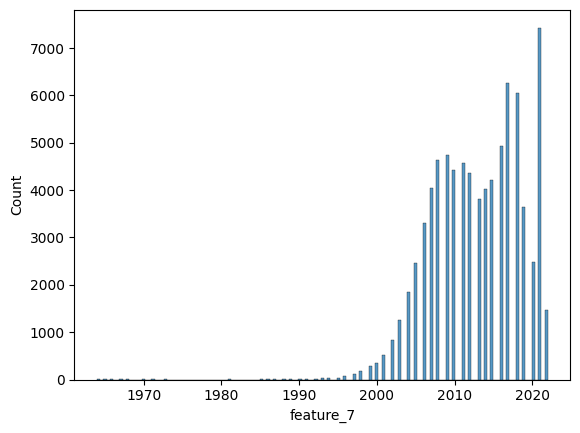

In [ ]:
sns.histplot(use_data.feature_7)

## 8 фича

<Axes: xlabel='feature_8', ylabel='Count'>

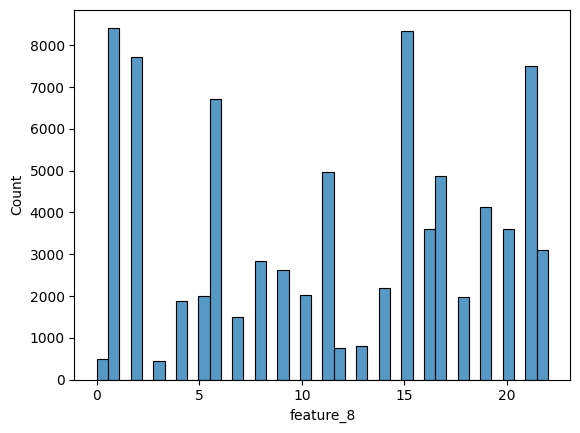

In [ ]:
sns.histplot(use_data.feature_8)

## 31 фича

<Axes: xlabel='feature_31', ylabel='Count'>

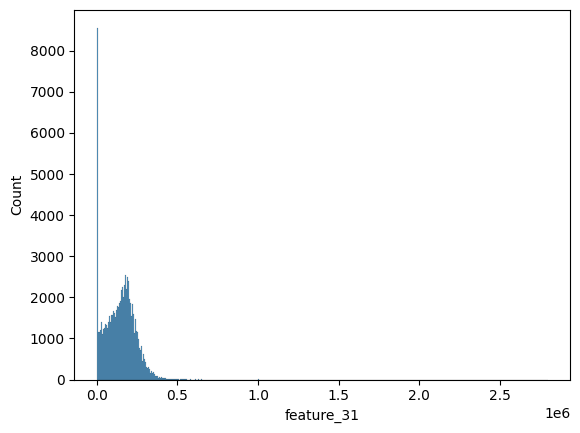

In [ ]:
sns.histplot(use_data.feature_31)

## 63 фича

<Axes: xlabel='feature_63', ylabel='Count'>

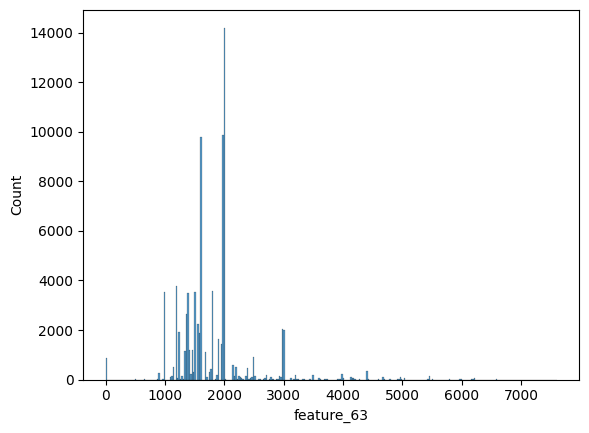

In [ ]:
sns.histplot(use_data.feature_63)

## 65 фича

<Axes: xlabel='feature_65', ylabel='Count'>

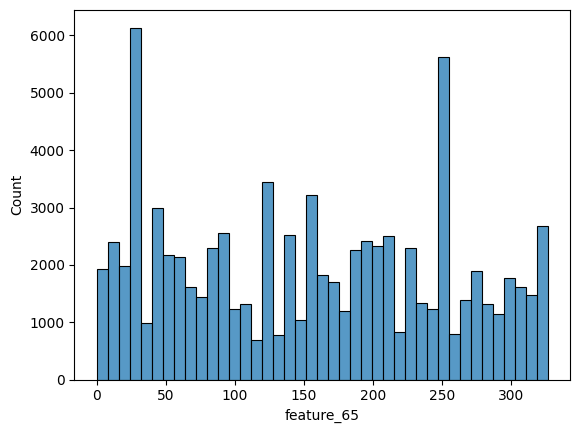

In [ ]:
sns.histplot(use_data.feature_65)

# Baseline модели

Будем вводить в бейзлайн модель фичи по одной, по уровню корреяции и следить за изменением метрики. Если она растнет на тесте, то фича полезная. Начем с 83.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_target[[col for col in use_data.columns if col != 'label']],
                                                    train_target.label, test_size=0.3, random_state=1)

base_xgb = XGBRegressor(random_state=1, device='cpu')

In [ ]:
columns = ['feature_7']

base_xgb.fit(X_train[columns], Y_train, verbose=True)

base_pred = base_xgb.predict(X_test[columns])
base_score = r2_score(Y_test, base_pred)
base_score

0.48243046783397825

In [ ]:
columns = ['feature_7', 'feature_31']

base_xgb.fit(X_train[columns], Y_train, verbose=True)

base_pred = base_xgb.predict(X_test[columns])
base_score = r2_score(Y_test, base_pred)
base_score

0.47905339268326685

31 фича ухудшила модель. Она сильно коррелирует с 7 фичей. Но все же попробуем ввести ее с регуряризацией:

In [ ]:
base_xgb = XGBRegressor(random_state=1, device='cpu', reg_lambda=0.1)

In [ ]:
columns = ['feature_7', 'feature_31']

base_xgb.fit(X_train[columns], Y_train, verbose=True)

base_pred = base_xgb.predict(X_test[columns])
base_score = r2_score(Y_test, base_pred)
base_score

0.4802180850151858

In [ ]:
columns = ['feature_7', 'feature_31', 'feature_63']

base_xgb.fit(X_train[columns], Y_train, verbose=True)

base_pred = base_xgb.predict(X_test[columns])
base_score = r2_score(Y_test, base_pred)
base_score

0.8694074223166268

63 улучшила

In [ ]:
columns = ['feature_7', 'feature_31', 'feature_63', 'feature_8']

base_xgb.fit(X_train[columns], Y_train, verbose=True)

base_pred = base_xgb.predict(X_test[columns])
base_score = r2_score(Y_test, base_pred)
base_score

0.9021347756642

8 улучшила

In [ ]:
columns = ['feature_7', 'feature_31', 'feature_63', 'feature_8', 'feature_65']

base_xgb.fit(X_train[columns], Y_train, verbose=True)

base_pred = base_xgb.predict(X_test[columns])
base_score = r2_score(Y_test, base_pred)
base_score

0.9378173378208676

65 улучшила

In [ ]:
columns = ['feature_7', 'feature_31', 'feature_63', 'feature_8', 'feature_65', 'feature_0']

base_xgb.fit(X_train[columns], Y_train, verbose=True)

base_pred = base_xgb.predict(X_test[columns])
base_score = r2_score(Y_test, base_pred)
base_score

0.9400008705303289

И даже фича 0 улучшила. Теперь подбирем гиперпараметры

# Baseline модель

# Подбор гиперпараметров

In [ ]:
xgb = XGBRegressor(random_state=1, device='cpu', reg_lambda=0.1)

In [ ]:
overall_param_grid = {'reg_lambda': [0.05, 0.1, 0.5],
                      'n_estimators': [100, 500, 800],
                      'max_depth': [2, 5, 10],
                      'learning_rate': [0.5, 1],
                      'eval_metric': [r2_score],
                      'grow_policy': ['depthwise'],
                      'booster': ['gbtree']}

In [ ]:
opt = GridSearchCV(xgb,
                   overall_param_grid, scoring = ['r2', 'neg_mean_squared_error'], cv=3,
                   verbose=4, error_score='raise', refit='r2')

In [ ]:
opt.fit(X_train[columns], Y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=2, n_estimators=100, reg_lambda=0.05; neg_mean_squared_error: (test=-981138522.698) r2: (test=0.869) total time=   0.2s
[CV 2/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=2, n_estimators=100, reg_lambda=0.05; neg_mean_squared_error: (test=-944067220.407) r2: (test=0.871) total time=   0.2s
[CV 3/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=2, n_estimators=100, reg_lambda=0.05; neg_mean_squared_error: (test=-941193033.363) r2: (test=0.874) total time=   0.2s
[CV 1/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=2, n_estimators=100, reg_lambda=0.1; neg_mean_squa

GridSearchCV(cv=3, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cpu',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1, ...),
             param_grid={'booster': ['gbtree'],
                         'eval_metric': [<function r2_score at 0x7844be66e200>],
                         'grow_policy': ['depthwise'],
                         'learning_rate': [0.5, 1], 'max_depth': [2, 5, 10],
                         'n_estimators': [100, 500, 800],
                         'reg_lambda': [0.05, 0.1, 0.5]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'], verbose=4)

In [ ]:
opt.best_score_

0.9159987575478287

In [ ]:
opt.best_params_

{'booster': 'gbtree',
 'eval_metric': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>,
 'grow_policy': 'depthwise',
 'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 100,
 'reg_lambda': 0.05}

In [ ]:
more_detailed_param_grid = {'reg_lambda': [0.02, 0.05, 0.08, 0.1],
                            'n_estimators': [50, 100, 150],
                            'max_depth': [3, 5, 8],
                            'learning_rate': [0.5],
                            'eval_metric': [r2_score],
                            'grow_policy': ['depthwise'],
                            'booster': ['gbtree']}

In [ ]:
more_detailed_opt = GridSearchCV(xgb,
                   more_detailed_param_grid, scoring = ['r2', 'neg_mean_squared_error'], cv=3,
                   verbose=4, error_score='raise', refit='r2')

In [ ]:
more_detailed_opt.fit(X_train[columns], Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=3, n_estimators=50, reg_lambda=0.02; neg_mean_squared_error: (test=-873958292.460) r2: (test=0.883) total time=   2.6s
[CV 2/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=3, n_estimators=50, reg_lambda=0.02; neg_mean_squared_error: (test=-837346863.649) r2: (test=0.886) total time=   1.6s
[CV 3/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=3, n_estimators=50, reg_lambda=0.02; neg_mean_squared_error: (test=-762613618.880) r2: (test=0.898) total time=   0.1s
[CV 1/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=3, n_estimators=50, reg_lambda=0.05; neg_mean_squared

GridSearchCV(cv=3, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cpu',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1, ...),
             param_grid={'booster': ['gbtree'],
                         'eval_metric': [<function r2_score at 0x7844be66e200>],
                         'grow_policy': ['depthwise'], 'learning_rate': [0.5],
                         'max_depth': [3, 5, 8], 'n_estimators': [50, 100, 150],
                         'reg_lambda': [0.02, 0.05, 0.08, 0.1]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'], verbose=4)

In [ ]:
more_detailed_opt.best_score_

0.9186816563138644

In [ ]:
more_detailed_opt.best_params_

{'booster': 'gbtree',
 'eval_metric': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>,
 'grow_policy': 'depthwise',
 'learning_rate': 0.5,
 'max_depth': 5,
 'n_estimators': 150,
 'reg_lambda': 0.02}

In [ ]:
even_more_detailed_param_grid = {'reg_lambda': [0.015, 0.02, 0.025, 0.03],
                      'n_estimators': [140, 150, 160],
                      'max_depth': [4, 5, 6, 7],
                      'learning_rate': [0.5],
                      'eval_metric': [r2_score],
                      'grow_policy': ['depthwise'],
                      'booster': ['gbtree']}

In [ ]:
even_more_detailed_opt = GridSearchCV(xgb,
                   even_more_detailed_param_grid, scoring = ['r2', 'neg_mean_squared_error'], cv=3,
                   verbose=4, error_score='raise', refit='r2')

In [ ]:
even_more_detailed_opt.fit(X_train[columns], Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=4, n_estimators=140, reg_lambda=0.015; neg_mean_squared_error: (test=-641460187.256) r2: (test=0.914) total time=   0.3s
[CV 2/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=4, n_estimators=140, reg_lambda=0.015; neg_mean_squared_error: (test=-589114205.757) r2: (test=0.920) total time=   0.3s
[CV 3/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=4, n_estimators=140, reg_lambda=0.015; neg_mean_squared_error: (test=-552371473.119) r2: (test=0.926) total time=   0.3s
[CV 1/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=4, n_estimators=140, reg_lambda=0.02; neg_mean_

GridSearchCV(cv=3, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cpu',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1, ...),
             param_grid={'booster': ['gbtree'],
                         'eval_metric': [<function r2_score at 0x7844be66e200>],
                         'grow_policy': ['depthwise'], 'learning_rate': [0.5],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [140, 150, 160],
                         'reg_lambda': [0.015, 0.02, 0.025, 0.03]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'], verbose=4)

In [ ]:
even_more_detailed_opt.best_score_

0.9208068392624091

In [ ]:
even_more_detailed_opt.best_params_

{'booster': 'gbtree',
 'eval_metric': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>,
 'grow_policy': 'depthwise',
 'learning_rate': 0.5,
 'max_depth': 4,
 'n_estimators': 160,
 'reg_lambda': 0.02}

In [ ]:
the_most_detailed_param_grid = {'reg_lambda': [0.015, 0.02, 0.025],
                              'n_estimators': [i for i in range(155, 165+1)],
                              'max_depth': [3, 4, 5, 6],
                              'learning_rate': [0.5],
                              'eval_metric': [r2_score],
                              'grow_policy': ['depthwise'],
                              'booster': ['gbtree']}

In [ ]:
the_most_detailed_opt = GridSearchCV(xgb,
                   the_most_detailed_param_grid, scoring = ['r2', 'neg_mean_squared_error'], cv=3,
                   verbose=4, error_score='raise', refit='r2')

In [ ]:
the_most_detailed_opt.fit(X_train[columns], Y_train)

Fitting 3 folds for each of 132 candidates, totalling 396 fits
[CV 1/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=3, n_estimators=155, reg_lambda=0.015; neg_mean_squared_error: (test=-741000296.110) r2: (test=0.901) total time=   0.3s
[CV 2/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=3, n_estimators=155, reg_lambda=0.015; neg_mean_squared_error: (test=-663812033.045) r2: (test=0.910) total time=   0.3s
[CV 3/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=3, n_estimators=155, reg_lambda=0.015; neg_mean_squared_error: (test=-653559793.884) r2: (test=0.913) total time=   0.3s
[CV 1/3] END booster=gbtree, eval_metric=<function r2_score at 0x7844be66e200>, grow_policy=depthwise, learning_rate=0.5, max_depth=3, n_estimators=155, reg_lambda=0.02; neg_mean

GridSearchCV(cv=3, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cpu',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None...
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=1, ...),
             param_grid={'booster': ['gbtree'],
                         'eval_metric': [<function r2_score at 0x7844be66e200>],
                         'grow_policy': ['depthwise'], 'learning_rate': [0.5],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [155, 156, 157, 158, 159, 160, 161,
                                          162, 163, 164, 165],
                         'reg_lambda': [0.015, 0.02, 0.025]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'], verbose=4)

In [ ]:
the_most_detailed_opt.best_score_

0.9208403542567835

In [ ]:
the_most_detailed_opt.best_params_

{'booster': 'gbtree',
 'eval_metric': <function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>,
 'grow_policy': 'depthwise',
 'learning_rate': 0.5,
 'max_depth': 4,
 'n_estimators': 165,
 'reg_lambda': 0.02}

In [ ]:
opt_pred = the_most_detailed_opt.predict(X_test[columns])
opt_score = r2_score(Y_test, opt_pred)
opt_score

0.9379936459671188

# Предсказание для submission

In [ ]:
submission = pd.read_pickle(folder_path/'data'/'submission.pkl')
submission.head()

,ID,label
0,77676,70166.298793
1,54244,70166.298793
2,100563,70166.298793
3,92984,70166.298793
4,64664,70166.298793


In [ ]:
sub_pred = the_most_detailed_opt.predict(test[columns])
sub_pred

array([ 58509.266, 152889.69 ,  74286.05 , ..., 202305.78 ,  20522.621,
        33555.688], dtype=float32)

In [ ]:
submission.label = [round(pred) for pred in sub_pred]
submission

,ID,label
0,77676,58509
1,54244,152890
2,100563,74286
3,92984,63620
4,64664,47111
...,...,...
35374,316,12523
35375,110869,22701
35376,116791,202306
35377,107246,20523


In [ ]:
submission.to_csv(folder_path/'my_second_submission.csv', index=False)

submission.to_csv('submission.csv', index=False)

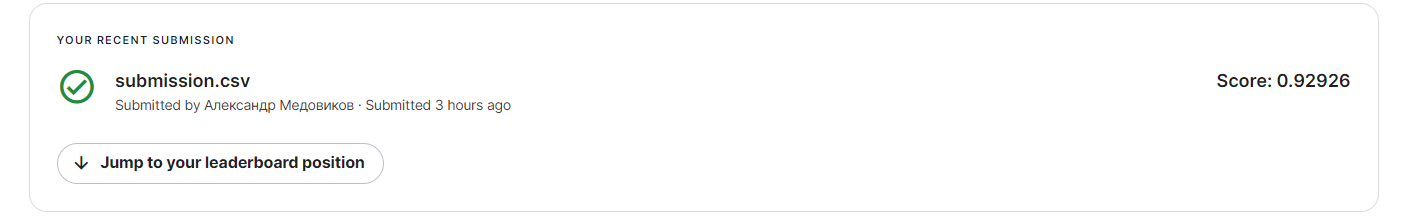